## Train on custiom data (detecting Orlen's Logo, Circle K's Logo and Price Tags)


### Setup the envirionment
To install necessary libraries we need a pip envirionemnt. To create one navigate to your project directory in cmd. Then run the commands:
- `python -m venv env`
- `/env/Scripts/activate`
- Install the neccesary libraries. That is `ultralytics` and `pytorch`.

### Import libraries
In order to use the `YOLO` model we import `ultralytics` library. It is very convienient, because now (for YOLO v8) we can use a pip package. We **do not need to clone the repository** any more.

In [1]:
from ultralytics import YOLO
from scripts import utils
%matplotlib inline

# Paths to train, validation and test data sets in YOLO format
TRAIN_DIR = r'custom_data/roboflow/images/train'
VAL_DIR = r'custom_data/roboflow/images/valid'
TEST_DIR = r'custom_data/roboflow/images/test'

### Training
For details on how to use the YOLO model check out [ultralytics documentation](https://docs.ultralytics.com/). The cell below will create a YOLO model and transfer pretrained weights. In the next line the model is trained. As the data atributte we specify `config.yaml`, because that is where the paths to data and class names are specified.

In [2]:
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights
model.train(data='config.yaml', epochs=1)

### Plotting predictions
To visualise results of our model we can plot the images with the predicted bounding boxes. To do that we load one of our previously trained models with satisfying results. All `YOLO` models are saved in the `/runs/detect` folder. We need to specify that we want get the best weights of our model. For example the path to a model traind by us could look like: `runs\detect\train22\weights\best.pt`.


image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\images\valid\20220910_202606_jpg.rf.8e280a68116711211e2e01ada832c143.jpg: 640x640 1 orlen, 1 prices, 270.3ms
Speed: 4.0ms preprocess, 270.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\images\valid\IMG_20230606_174710_jpg.rf.2c24f95c364721b9c87e5f11887ab6c5.jpg: 640x640 1 orlen, 1 prices, 204.5ms
Speed: 5.0ms preprocess, 204.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\images\valid\IMG_20230606_193015_jpg.rf.30c164d15d2a356689df2e4369c0cb0e.jpg: 640x640 1 circlek, 2 pricess, 216.4ms
Speed: 3.0ms preprocess, 216.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\roboflow\images\valid\IMG

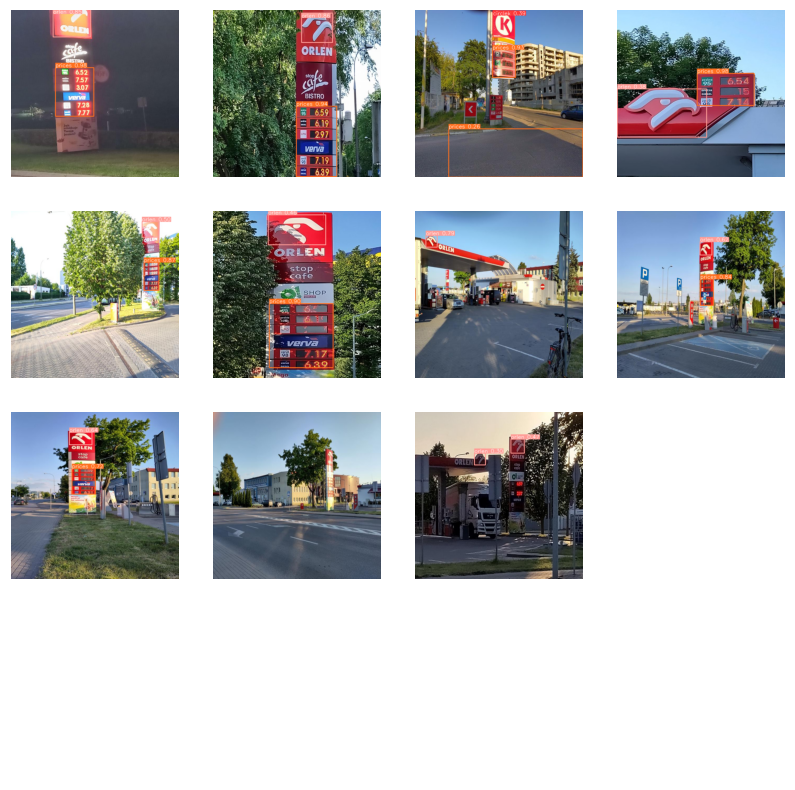

In [3]:
path_to_trained_model = r'runs\detect\train22\weights\best.pt'
trained_myself = YOLO(path_to_trained_model) # Load model

# Plot the model results for the validation set
utils.plot_results_one_fig(dir=VAL_DIR, model=trained_myself)


### Final test for the model (This is the funny part).


image 1/1 C:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\orlen-ultimate-photo.jpg: 640x480 2 orlens, 1 prices, 168.4ms
Speed: 3.0ms preprocess, 168.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x480 2 orlens, 1 prices, 149.0ms
Speed: 6.0ms preprocess, 149.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


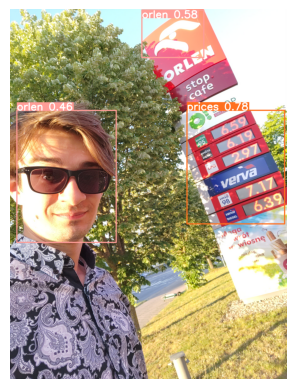

In [4]:
utils.plot_results(model=trained_myself, image=r'C:\Users\janek\notebooks\petrol-prices-object-detection\custom_data\orlen-ultimate-photo.jpg')

In [ ]:
# TODO: Generate requirements.txt